In [155]:
import pandas as pd
import utils.DataEngine as de
import matplotlib.pyplot as plt
import collections
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import Ridge, LinearRegression, Lasso
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [156]:
de1 = de.DataEngine('data2024')

In [374]:
df = de1.data['round_1']['price_df']
sdf = df[df['product'] == 'STARFRUIT'].copy()
adf = df[df['product'] == 'AMETHYSTS'].copy()

In [375]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,0.0


In [160]:
adf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,0.0
3992,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,0.0
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0


In [161]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0


In [162]:
LEN = 4
X = pd.DataFrame(columns=[f"lagg {i+1}" for i in range(LEN)])
for i in range(LEN):
    X[f"lagg {i+1}"] = sdf.mid_price.shift(i+1)
X = sm.add_constant(X)
y = sdf.mid_price.iloc[4:]
X = X.iloc[4:]

In [163]:
X

,const,lagg 1,lagg 2,lagg 3,lagg 4
9,1.0,4999.5,5000.0,5000.0,5002.5
11,1.0,4998.5,4999.5,5000.0,5000.0
12,1.0,4999.5,4998.5,4999.5,5000.0
15,1.0,5001.0,4999.5,4998.5,4999.5
17,1.0,5000.0,5001.0,4999.5,4998.5
...,...,...,...,...,...
3990,1.0,4949.5,4951.5,4954.0,4950.5
3993,1.0,4952.5,4949.5,4951.5,4954.0
3994,1.0,4952.5,4952.5,4949.5,4951.5
3996,1.0,4952.5,4952.5,4952.5,4949.5


In [164]:
y

9       4998.5
11      4999.5
12      5001.0
15      5000.0
17      5000.0
         ...  
3990    4952.5
3993    4952.5
3994    4952.5
3996    4952.5
3998    4952.0
Name: mid_price, Length: 1996, dtype: float64

In [165]:
m = sm.OLS(y, X)
res = m.fit()

In [166]:
res.params

const     4.392047
lagg 1    0.330427
lagg 2    0.223498
lagg 3    0.251663
lagg 4    0.193519
dtype: float64

In [167]:
model = AutoReg(sdf['mid_price'], lags=4)
model_fitted = model.fit()
model_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(4)   Log Likelihood               -3467.787
Method:               Conditional MLE   S.D. of innovations              1.375
Date:                Thu, 28 Mar 2024   AIC                           6947.574
Time:                        18:13:26   BIC                           6981.167
Sample:                             4   HQIC                          6959.910
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3920     10.797      0.407      0.684     -16.769      25.553
mid_price.L1     0.3304      0.022     15.050      0.000       0.287       0.373
mid_price.L2     0.2235      0.022      9.943      0.000       0.179       0.268
mid_price.L3     0.2517      0.022     11.196      0.000       0.208       0.296
mid_price.L4     0.1935      0.022      8.816      0.000       0.150       0.237
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2           -0.1964           -1.6336j            1.6454           -0.2690
AR.3           -0.1964           +1.6336j            1.6454            0.2690
AR.4           -1.9081           -0.0000j            1.9081           -0.5000
-----------------------------------------------------------------------------
"""

In [168]:
model2 = AutoReg(sdf['mid_price'], lags=2)
model2_fitted = model2.fit()
model2_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(2)   Log Likelihood               -3622.079
Method:               Conditional MLE   S.D. of innovations              1.483
Date:                Thu, 28 Mar 2024   AIC                           7252.158
Time:                        18:13:26   BIC                           7274.558
Sample:                             2   HQIC                          7260.383
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2278     11.614      1.311      0.190      -7.535      37.991
mid_price.L1     0.5429      0.020     27.251      0.000       0.504       0.582
mid_price.L2     0.4540      0.020     22.778      0.000       0.415       0.493
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           +0.0000j            1.0021            0.0000
AR.2           -2.1981           +0.0000j            2.1981            0.5000
-----------------------------------------------------------------------------
"""

In [169]:
model2_fitted.params

const           15.227814
mid_price.L1     0.542945
mid_price.L2     0.453990
dtype: float64

In [170]:
model_lst = []
for i in range(1, 6):
    model = AutoReg(sdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [171]:
def calc_vals(model_lst):
    i = 1
    v_dict = {}
    for model in model_lst:
        p_arr = np.array(model.params[1:])

        l_arr = np.array([sdf['mid_price'].shift(i+1) for i in range(len(p_arr))])

        p_arr_reshaped = p_arr.reshape(-1, 1)

        s = p_arr_reshaped * l_arr
        s = np.sum(s, axis=0)

        r = s - sdf['mid_price'] + model.params[0]

        v_dict[i] = (r.mean(), r.std())
        i += 1
    
    return v_dict

In [172]:
d = calc_vals(model_lst)

C:\Users\giova\AppData\Local\Temp\ipykernel_27672\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [173]:
d

{1: (1.196035125088776e-09, 1.6650189485640157),
 2: (7.99054823864999e-10, 1.4831440319447955),
 3: (2.848594790195387e-10, 1.401758021400386),
 4: (6.895026967549073e-12, 1.3753115526938362),
 5: (9.930588014395838e-12, 1.3604543890463183)}

In [444]:
de2 = de.DataEngine('data2023')
dfb = de2.data['round_4']['price_df']
bdf = dfb[dfb['product'] == 'BANANAS']
bdf

In [177]:
model4 = AutoReg(bdf['mid_price'], lags=1)
model_fitted4 = model.fit()
model_fitted4.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                     AutoReg(5)   Log Likelihood               -3444.381
Method:               Conditional MLE   S.D. of innovations              1.360
Date:                Thu, 28 Mar 2024   AIC                           6902.761
Time:                        18:13:30   BIC                           6941.950
Sample:                             5   HQIC                          6917.152
                                 2000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7455     10.691      0.163      0.870     -19.208      22.699
mid_price.L1     0.3017      0.022     13.626      0.000       0.258       0.345
mid_price.L2     0.1868      0.023      8.152      0.000       0.142       0.232
mid_price.L3     0.2189      0.023      9.609      0.000       0.174       0.264
mid_price.L4     0.1468      0.023      6.404      0.000       0.102       0.192
mid_price.L5     0.1454      0.022      6.571      0.000       0.102       0.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           -0.0000j            1.0001           -0.0000
AR.2            0.3263           -1.5413j            1.5754           -0.2168
AR.3            0.3263           +1.5413j            1.5754            0.2168
AR.4           -1.3311           -0.9991j            1.6643           -0.3975
AR.5           -1.3311           +0.9991j            1.6643            0.3975
-----------------------------------------------------------------------------
"""

In [178]:
model_lst_b = []
for i in range(1, 6):
    model = AutoReg(bdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst_b.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [179]:
d1 = calc_vals(model_lst_b)

C:\Users\giova\AppData\Local\Temp\ipykernel_27672\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [180]:
d1

{1: (-0.20988451730493118, 1.6666213111172459),
 2: (-0.09743089276677099, 1.483675499343971),
 3: (-0.05567740114250094, 1.4034441614397692),
 4: (-0.033364098768230516, 1.3768540744344433),
 5: (-0.017595422491330216, 1.3624329804958126)}

In [181]:
val4 = bdf['mid_price'].shift(4)
val3 = bdf['mid_price'].shift(3)
val2 = bdf['mid_price'].shift(2)
val1 = bdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - bdf['mid_price'] + a
s.mean(), s.std()

(-0.04512892688968359, 1.5107047407205954)

In [182]:
coef = [0.14543357760079334, 0.14680375449599525, 0.21887676195406236, 0.18681650032375252,  0.3017063656145469]
intercept = 1.7455163186868958

cache = [1, 1, 1, 1, 1]

(np.array(cache) * np.array(coef))

array([0.14543358, 0.14680375, 0.21887676, 0.1868165 , 0.30170637])

In [183]:
sum(coef)

0.9996369599891504

In [295]:
class Analysis:
    def __init__(self, i, y_pred, y_test, coef, r2) -> None:
        self.ar_val = i
        self.y_pred = y_pred
        self.y_test = y_test
        self.coef = coef
        self.u_mse = ((y_test - y_pred)**2).sum()
        self.r2 = r2

        y_sub = y_pred - y_test
        condition = y_sub != 0

        self.wrong_count = (condition).sum()

        self.wrong_mean = y_sub[condition].mean()
        self.wrong_std = y_sub[condition].std()

In [619]:
def test_regression_models(tot_test, df_test, X_var, y_var, models_to_test=[LinearRegression()]):
    lst_vals = []
    size = int(len(df_test)/4)

    for i in range(1, tot_test+1):
        X_full = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        t = df_test[X_var].iloc[:size + i]
        y1 = df_test[y_var].iloc[:size + i]
        for j in range(i):
            X_full[f"lagg {j+1}"] = t.shift(j+1)

        y_train = y1.iloc[i:]
        X_train = X_full.iloc[i:]

        X_full_k = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        k = df_test[X_var].iloc[size + i:]
        y2 = df_test[y_var].iloc[size + i:]
        for j in range(i):
            X_full_k[f"lagg {j+1}"] = k.shift(j+1)

        y_test = y2.iloc[i:]
        X_test = X_full_k.iloc[i:]

        for mod in models_to_test:
            mod.fit(X_train, y_train)
            y_pred = mod.predict(X_test)
            y_pred = np.around(y_pred, decimals=0)

            r2 = r2_score(y_test, y_pred)

            lst_vals.append(Analysis(i, y_pred, y_test, mod.coef_, r2))

    return lst_vals

In [297]:
val4 = sdf['mid_price'].shift(4)
val3 = sdf['mid_price'].shift(3)
val2 = sdf['mid_price'].shift(2)
val1 = sdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - sdf['mid_price'] + a
s.mean(), s.std()

(-0.18483031123709295, 1.5422175716802697)

In [298]:
sdf[sdf['bid_price_1'] < sdf['mid_price'].shift(1)]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0,4997,5003
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0,4995,5002
11,-2,500,STARFRUIT,4996,30,NaN,NaN,NaN,NaN,5003,30,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0,4949,4956


In [426]:
condition_bid = (sdf['bid_price_1'] <= sdf['mid_price'].shift(1)) | sdf['bid_price_2'].isna()
bid_selected_series = np.where(condition_bid, sdf['bid_price_1'], sdf['bid_price_2'])

condition_ask = (sdf['ask_price_1'] >= sdf['mid_price'].shift(1)) | sdf['ask_price_2'].isna()
ask_selected_series = np.where(condition_ask, sdf['ask_price_1'], sdf['ask_price_2'])

sdf['bid_selected_series'] = bid_selected_series.astype(int)
sdf['ask_selected_series'] = ask_selected_series.astype(int)

In [427]:
bi, ai = test_regression_models(5, sdf, 'bid_selected_series', 'bid_price_1'), test_regression_models(5, sdf, 'ask_selected_series', 'ask_price_1')

In [428]:
for index in range(len(bi)):
    print(index)
    print(bi[index].wrong_count, ai[index].wrong_count)
    print((bi[index].wrong_mean, bi[index].wrong_std), (ai[index].wrong_mean, ai[index].wrong_std))
    print(bi[index].u_mse, ai[index].u_mse)

0
1326 991
(1.1304675716440422, 1.8384630804541304) (1.1049445005045408, 2.160500730388121)
6173.0 5831.0
1
1188 872
(0.6675084175084175, 1.8809706005404703) (0.34059633027522934, 2.1922111600558796)
4729.0 4287.0
2
1064 1027
(0.34116541353383456, 1.9974482674821326) (-0.16358325219084713, 2.0132402900618205)
4365.0 4186.0
3
1013 1065
(0.23593287265547877, 2.0173682723978805) (-0.28262910798122065, 1.9509802429451857)
4175.0 4135.0
4
995 1174
(0.15376884422110554, 2.0313125685975124) (-0.5178875638841567, 1.861148606555892)
4125.0 4378.0


In [429]:
best_bi = bi[3]
best_ai = ai[3]

mids = ((best_bi.y_test + best_ai.y_test) / 2)
mid_preds = ((best_bi.y_pred + best_ai.y_pred) / 2)
mid_diffs = mid_preds - mids

(mid_diffs > 1).sum()

mid_diffs[mid_diffs <= -1].mean(), mid_diffs[mid_diffs >= 1].mean()

(-1.781150159744409, 1.742671009771987)

In [457]:
de2 = de.DataEngine('data2023')
dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb1 = dfb1[dfb1['product'] == 'BANANAS']
dfb2 = dfb2[(dfb2['product'] == 'BANANAS') & (dfb2.day == 1)]
dfb3 = dfb3[(dfb3['product'] == 'BANANAS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'BANANAS') & (dfb4.day == 3)]

dfb = pd.concat([dfb1, dfb2, dfb3, dfb4])

In [479]:
dfb

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series_ban,ask_selected_series_ban
0,-2,0,BANANAS,4997.0,26.0,NaN,NaN,NaN,NaN,5003.0,26.0,NaN,NaN,NaN,NaN,5000.0,0.000000,4997,5003
2,-2,100,BANANAS,4997.0,20.0,NaN,NaN,NaN,NaN,4998.0,1.0,5004.0,20.0,NaN,NaN,4997.5,2.863281,4997,5004
5,-2,200,BANANAS,4997.0,31.0,NaN,NaN,NaN,NaN,5004.0,31.0,NaN,NaN,NaN,NaN,5000.5,2.536621,4997,5004
7,-2,300,BANANAS,4997.0,27.0,NaN,NaN,NaN,NaN,5004.0,27.0,NaN,NaN,NaN,NaN,5000.5,2.405762,4997,5004
9,-2,400,BANANAS,4997.0,20.0,NaN,NaN,NaN,NaN,5002.0,9.0,5004.0,20.0,NaN,NaN,4999.5,2.925781,4997,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329950,3,5999500,BANANAS,4751.0,1.0,4748.0,22.0,NaN,NaN,4755.0,22.0,NaN,NaN,NaN,NaN,4753.0,179236.000000,4751,4755
329963,3,5999600,BANANAS,4748.0,30.0,NaN,NaN,NaN,NaN,4749.0,1.0,4753.0,5.0,4755.0,30.0,4748.5,178564.000000,4748,4753
329977,3,5999700,BANANAS,4748.0,20.0,NaN,NaN,NaN,NaN,4755.0,20.0,NaN,NaN,NaN,NaN,4751.5,178380.000000,4748,4755
329982,3,5999800,BANANAS,4748.0,23.0,NaN,NaN,NaN,NaN,4753.0,2.0,4755.0,23.0,NaN,NaN,4750.5,178496.000000,4748,4753


In [459]:
modelb = AutoReg(dfb['mid_price'], lags=4)
model_fittedb = modelb.fit()
model_fittedb.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                60000
Model:                     AutoReg(4)   Log Likelihood             -104163.614
Method:               Conditional MLE   S.D. of innovations              1.373
Date:                Thu, 28 Mar 2024   AIC                         208339.228
Time:                        19:32:37   BIC                         208393.240
Sample:                             4   HQIC                        208356.005
                                60000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4578      0.385      1.188      0.235      -0.297       1.213
mid_price.L1     0.3425      0.004     85.596      0.000       0.335       0.350
mid_price.L2     0.2561      0.004     61.605      0.000       0.248       0.264
mid_price.L3     0.2030      0.004     48.834      0.000       0.195       0.211
mid_price.L4     0.1983      0.004     49.557      0.000       0.190       0.206
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2           -1.7645           -0.0000j            1.7645           -0.5000
AR.3           -0.1296           -1.6855j            1.6905           -0.2622
AR.4           -0.1296           +1.6855j            1.6905            0.2622
-----------------------------------------------------------------------------
"""

In [468]:
condition_bid_ban = (dfb['bid_price_1'] <= dfb['mid_price'].shift(1)) | dfb['bid_price_2'].isna()
bid_selected_series_ban = np.where(condition_bid_ban, dfb['bid_price_1'], dfb['bid_price_2'])

condition_ask_ban = (dfb['ask_price_1'] >= dfb['mid_price'].shift(1)) | dfb['ask_price_2'].isna()
ask_selected_series_ban = np.where(condition_ask_ban, dfb['ask_price_1'], dfb['ask_price_2'])

dfb['bid_selected_series_ban'] = bid_selected_series_ban.astype(int)
dfb['ask_selected_series_ban'] = ask_selected_series_ban.astype(int)

In [469]:
ban_b, ban_a = test_regression_models(5, dfb, 'bid_selected_series_ban', 'bid_price_1'), test_regression_models(5, dfb, 'ask_selected_series_ban', 'ask_price_1')

In [473]:
for index in range(len(ban_b)):
    print(index)
    print(ban_b[index].wrong_count, ban_a[index].wrong_count)
    print((ban_b[index].wrong_mean, ban_b[index].wrong_std), (ban_a[index].wrong_mean, ban_a[index].wrong_std))
    print(ban_b[index].u_mse, ban_a[index].u_mse)
    print(ban_b[index].r2, ban_a[index].r2)

0
36100 24784
(0.6668144044321329, 1.9204983480851099) (0.5971998063266624, 2.265868116393288)
149196.0 136079.0
0.9986728827857959 0.9987918856286291
1
31990 27612
(0.31412941544232575, 1.9969835133184093) (0.265681587715486, 2.0885208929311747)
130727.0 122386.0
0.998837049472055 0.9989133452507186
2
30929 29180
(0.2233502538071066, 2.012788077458432) (0.12416038382453735, 2.0148457451435613)
126842.0 118905.0
0.9988715026732795 0.9989441470288168
3
30722 29406
(0.19871753141071544, 2.0067740288553915) (0.11569067537237299, 1.99876190484661)
124931.0 117868.0
0.9988883954236673 0.9989532505552163
4
30622 29814
(0.18718568349552608, 2.0072453887256017) (0.0844234252364661, 1.981944006280311)
124446.0 117321.0
0.9988926020479781 0.9989580105931837


In [496]:
best_b = ban_b[3]
best_a = ban_a[3]

mids_b = ((best_b.y_test + best_a.y_test) / 2)
mid_preds_b = ((best_b.y_pred + best_a.y_pred) / 2)
mid_diffs_b = mid_preds_b - mids_b

mid_diffs_b[mid_diffs_b != 0].std()

1.4519098816963127

In [600]:
val4_b = sdf['mid_price'].shift(4)
val3_b = sdf['mid_price'].shift(3)
val2_b = sdf['mid_price'].shift(2)
val1_b = sdf['mid_price'].shift(1)

co4_b, co3_b, co2_b, co1_b = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a_b = 4.481696494462085

vals_b = (co4_b*val4_b +  co3_b*val3_b  +co2_b*val2_b + co1_b*val1_b) + a_b

In [514]:
60_000 - len(mids_b)

15008

In [623]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')

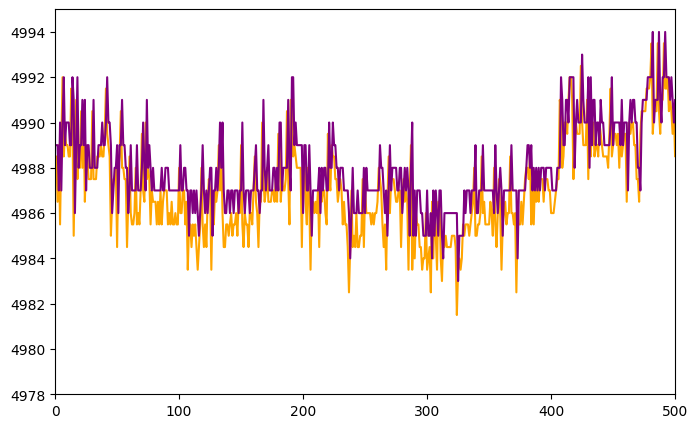

In [631]:
best_mid = mid_i[0]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mid_preds_p - mids_p

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(mids_p)), mids_p, color='orange')
plt.plot(np.arange(len(mids_p)), mid_preds_p, color='purple')
plt.xlim(0, 500)
plt.ylim(4978, 4995)

plt.show()

In [625]:
2000 - len(mids_p)

502

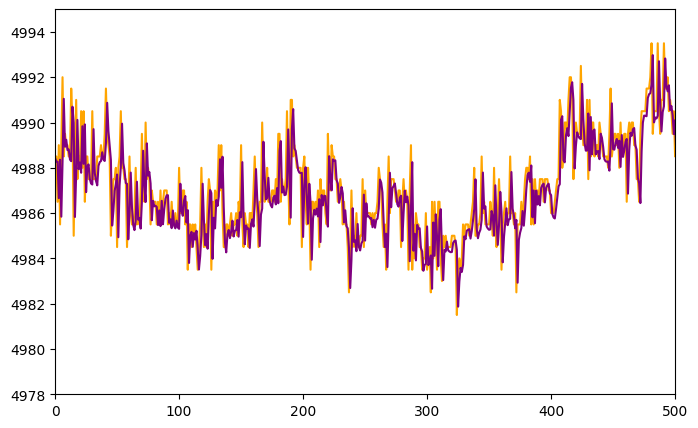

In [630]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(vals_b[502:])), sdf['mid_price'].iloc[502:], color='orange')
plt.plot(np.arange(len(vals_b[502:])), vals_b[502:], color='purple')
plt.xlim(0, 500)
plt.ylim(4978, 4995)
plt.show()